In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
#Setting up the environment
import nltk


In [ ]:
#This opens up an interactive shell up top. First, list, pick one identifier then download it. 
#After downloader is complete, you can close the shell by using q.
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [2]:
#Use dataset from the UCI dataset repository:
messages = pd.read_csv('/Users/lukeopany/Documents/nlp/SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'message'])
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#print out the first 10 messages and number them using enumerate (for loop)

for i, message in enumerate(messages['message'][:10]):
    print(f"Message {i+1}: {message}")
    print('\n')

Message 1: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Message 2: Ok lar... Joking wif u oni...


Message 3: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Message 4: U dun say so early hor... U c already then say...


Message 5: Nah I don't think he goes to usf, he lives around here though


Message 6: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


Message 7: Even my brother is not like to speak with me. They treat me like aids patent.


Message 8: As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


Message 9: WINNER!! As a valued network customer you have been selected to receivea £900 prize rewa

In [ ]:
#Exploratory Data Analysis to help understand the content better 

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#Let's start with a higher level view of this dataset just to get a sense of what actually separates a spam and ham 

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
#Create a new column to detect how long the messages are
messages['length'] = messages['message'].apply(len)
messages.head()


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

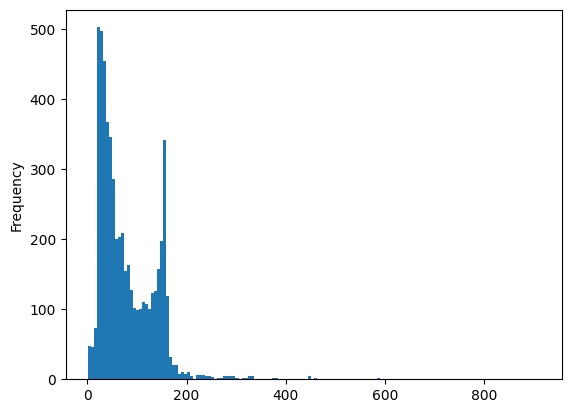

In [ ]:
#Let's visualize the length of the messages 
#Trying to see if message length is a distinguishing feature between ham and spam   

messages['length'].plot(bins=150, kind='hist')

In [ ]:
messages['length'].describe()
#We notice that there's quite a long message (910 characters). Let's investigate further, and find it.


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

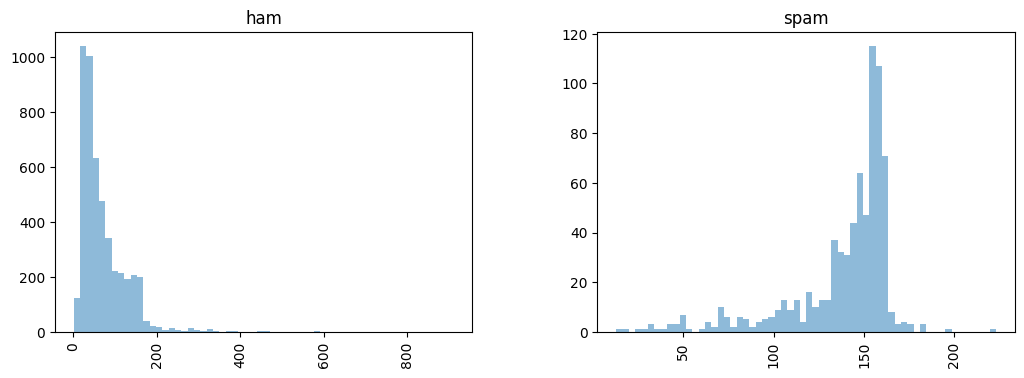

In [19]:
#From this, we can tell that spam messages tend to have a longer length compared to ham messages.
messages.hist(column='length', by='label', bins=60, alpha=0.5, figsize=(12, 4))

In [ ]:
#Text Preprocessing 
#Our data is most in text format or string, and classification models need numeric feature vector in order to perform the classification task, so it is essential to convert the text data into a suitable format. 
# 1.Write a function that will split a message into it's individual words and return a list 
# 2. Remove very common words 'the' , 'a', 'an', 'is', 'are', 'was', 'were', 'to', 'of', 'and' etc.
# 3. Take advantage of Python's inbuilt string library


In [8]:
import string   

In [9]:
#Remove Punctuation
mess = 'Sample Message Notice: it has punctuation.'


In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
no_punc = [c for c in mess if c not in string.punctuation]
no_punc


['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [14]:
#Remove Stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
no_punct = "".join(no_punc)
no_punct

'Sample Message Notice it has punctuation'

In [17]:
no_punct.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [18]:
clean_mess = [word for word in no_punct.split() if word not in stopwords.words('english')]

In [20]:
def text_process(mess):
    """
    1. Remove Punctuation
    2. Remove Stopwords
    3. Return list of clean text words 
    """
    # Remove Punctuation
    no_punc = [c for c in mess if c not in string.punctuation]
    no_punct = "".join(no_punc)

    # Remove Stopwords
    return [word for word in no_punct.split() if word.lower() not in stopwords.words('english')]


In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
messages['message'].head(5).apply(text_process) #creating stopwords and removing a list of these tokens 

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
#Vectorization. For this project we leave out stemming because of words like 'nah', 'yep', 'nope' which may lose their meaning.
#The process we will use is:
"""
1. Count how many times does a word appear in a message(frequency) -- CountVectorizer
2. Weight the counts, so that more frequent tokens get lower weights(inverse document frequency)
3. Normalize the vectors to unit length. 
"""

'\n1. Count how many times does a word appear in a message(frequency)\n2. Weight the counts, so that more frequent tokens get lower weights(inverse document frequency)\n3. Normalize the vectors to unit length. \n'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow = bow_transformer.fit_transform(messages['message'])

In [30]:
print(len(bow_transformer.vocabulary_))  # Number of unique words in the vocabulary 

11425


In [33]:
bow4 = bow_transformer.transform(messages['message'])[3]  # Transforming the messages into a bag of words format
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [36]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [37]:
print(bow4.shape)

(1, 11425)


In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [40]:
print('Shape of Sparse Matrix: ', messages_bow.shape) #only stores row position, column position, and actual values for non-zero entries ONLY

Shape of Sparse Matrix:  (5572, 11425)


In [ ]:
messages_bow.nnz # Number of non-zero entries in the sparse matrix
#so out of a possible 63.6 million entries, this only stores 50548
#sparse = a few 

50548

In [44]:
#Term weight and normalization next, now that count vectorization is done. This is done by (tf-idf)

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [47]:
tdif4 = tfidf_transformer.transform(bow4)  # Transforming the bag of words into tf-idf format
print (tdif4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.40832589933384067
  (0, 4629)	0.26619801906087187
  (0, 5261)	0.29729957405868723
  (0, 6204)	0.29953799723697416
  (0, 6222)	0.3187216892949149
  (0, 7186)	0.4389365653379857
  (0, 9554)	0.5385626262927564


In [49]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [50]:
messages_tfidf = tfidf_transformer.transform(messages_bow)  # Transforming the entire bag of words into tf-idf format

In [52]:
#Use Naive Bayes to train the classifier 

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])  # Fitting the model with the tf-idf features and labels

In [55]:
spam_detect_model.predict(messages_tfidf)[0]  # Predicting the label for the first message

np.str_('ham')

In [67]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)


In [61]:
#scikit learn has a data pipeline feature which saves so much time: we can use that instead of going through this whole process. 
from sklearn.pipeline import Pipeline

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Step 1: Convert text to bag of words
    ('tfidf', TfidfTransformer()),  # Step 2: Transform to tf-idf
    ('classifier', MultinomialNB())  # Step 3: Train the classifier
])

In [68]:
pipeline.fit(msg_train, label_train)  # Fitting the pipeline with training data

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [69]:
predictions = pipeline.predict(msg_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.69      0.81       226

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

